In [2]:
import matplotlib.pyplot as plt
import numpy as np
import illustris_python.groupcat as gc
%matplotlib inline

In [3]:
hubble = 0.704

In [4]:
basePath = "/hpcfs/home/ciencias/fisica/docentes/je.forero/Illustris-1/"

In [5]:
subhalo_fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloPos', 
                  'SubhaloVel', 'SubhaloParent', 'SubhaloGrNr', 'SubhaloStellarPhotometrics']
subhalos = gc.loadSubhalos(basePath,135,fields=subhalo_fields)
photo = {'U':0, 'B':1, 'V':2, 'K':3, 'g':4, 'r':5, 'i':6, 'z':7}

In [6]:
halo_fields = ['GroupFirstSub', 'Group_M_Crit200', 'Group_R_Crit200', 
               'GroupNsubs', 'GroupPos', 'GroupVel', 'GroupFirstSub']
halos = gc.loadHalos(basePath, 135, fields=halo_fields)

In [7]:
n_halos = len(halos['GroupNsubs'])
print(n_halos)

7713601


In [8]:
K_mags = subhalos['SubhaloStellarPhotometrics'][:,photo['K']]
K_selection = K_mags<-21.0
K_star = -23.55
print(np.count_nonzero(K_selection), K_mags.min())


16989 -28.2147


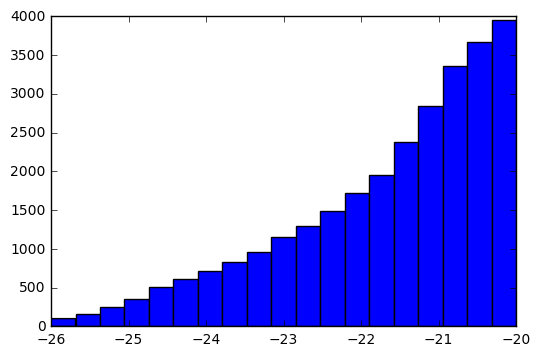

In [9]:
l = plt.hist(K_mags, bins=np.linspace(-26,-20,20))

In [46]:
pos_in = subhalos['SubhaloPos'][K_selection]
vel_in = subhalos['SubhaloVel'][K_selection]
mags_in = subhalos['SubhaloStellarPhotometrics'][K_selection]
K_mags_in = mags_in[:,photo['K']]

In [47]:
n_in = len(pos_in)
print(n_in)
K_select_center = np.where((K_mags_in>K_star-0.01) & (K_mags_in<K_star+0.01))
K_select_center = K_select_center[0]
center_id = np.random.choice(K_select_center)

16989


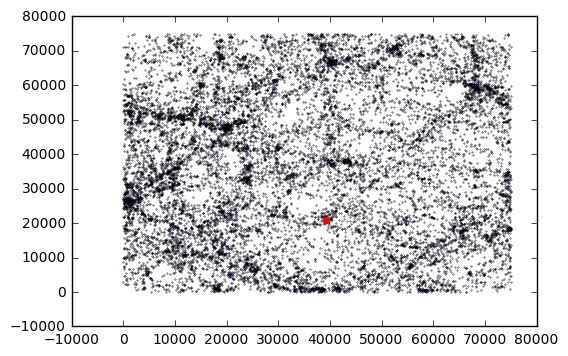

In [55]:
plt.scatter(pos_in[:,0], pos_in[:,1], s=0.1)
plt.scatter(pos_in[center_id,0], pos_in[center_id,1], color='red')

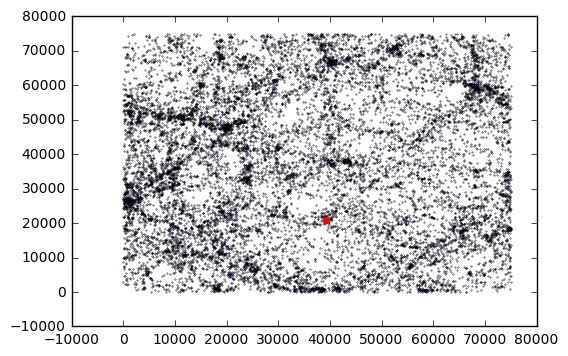

In [56]:
plt.scatter(pos_in[:,0], pos_in[:,1], s=0.1)
plt.scatter(pos_in[center_id,0], pos_in[center_id,1], color='red')

In [134]:
lbox = 75000.0
pos_center = pos_in[center_id]
vel_center = vel_in[center_id]
centered_pos = (pos_in - pos_center)
centered_vel = (vel_in - vel_center)

off_x = np.where(centered_pos[:,0] >= lbox/2.0)
off_x = off_x[0]
if len(off_x)>1:
    centered_pos[off_x,0] = centered_pos[off_x,0] - lbox
else:
    off_x = np.where(centered_pos[:,0] <= -lbox/2.0)
    off_x = off_x[0]
    centered_pos[off_x,0] = centered_pos[off_x,0] + lbox

    
off_y = np.where(centered_pos[:,1] >= lbox/2.0)
off_y = off_y[0]
if len(off_y)>1:
    centered_pos[off_y,1] = centered_pos[off_y,1] - lbox
else:
    off_y = np.where(centered_pos[:,1] <= -lbox/2.0)
    off_y = off_y[0]
    centered_pos[off_y,1] = centered_pos[off_y,1] + lbox

off_z = np.where(centered_pos[:,2] >= lbox/2.0)
off_z = off_z[0]
if len(off_z)>1:
    centered_pos[off_z,2] = centered_pos[off_z,2] - lbox
else:
    off_z = np.where(centered_pos[:,2] <= -lbox/2.0)
    off_z = off_z[0]
    centered_pos[off_z,2] = centered_pos[off_z,2] + lbox

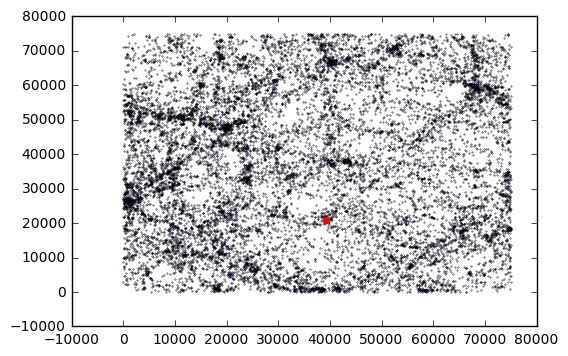

In [135]:

plt.scatter(pos_in[:,0], pos_in[:,1], s=0.1)
plt.scatter(pos_in[center_id,0], pos_in[center_id,1], color='red')

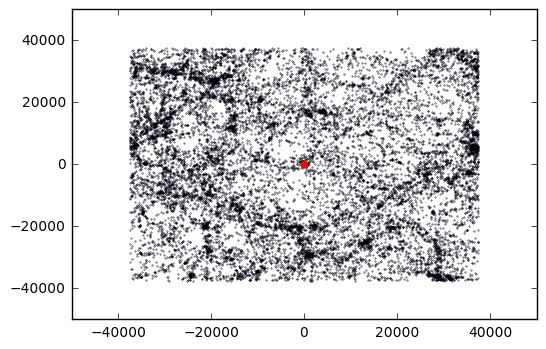

In [136]:
plt.scatter(centered_pos[:,0], centered_pos[:,1], s=0.1)
plt.scatter(centered_pos[center_id,0], centered_pos[center_id,1], color='red')


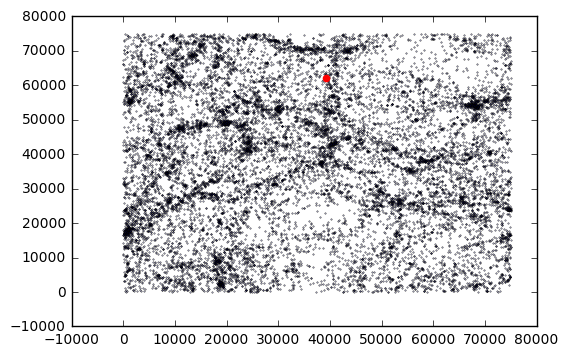

In [137]:
plt.scatter(pos_in[:,0], pos_in[:,2], s=0.1)
plt.scatter(pos_in[center_id,0], pos_in[center_id,2], color='red')

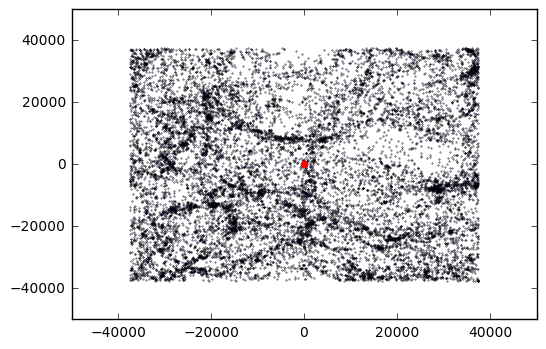

In [138]:
plt.scatter(centered_pos[:,0], centered_pos[:,2], s=0.1)
plt.scatter(centered_pos[center_id,0], centered_pos[center_id,2], color='red')

In [139]:
r = np.sqrt(centered_pos[:,0]**2 + centered_pos[:,1]**2 + centered_pos[:,2]**2)

theta = np.arccos(centered_pos[:,2]/r)
phi = np.arccos(centered_pos[:,0]/np.abs(r*np.sin(theta)))

q_3 = (centered_pos[:,0]<0) &(centered_pos[:,1]<0)
phi[q_3] = 2.0*np.pi - phi[q_3]
q_4 = (centered_pos[:,0]>0) &(centered_pos[:,1]<0)
phi[q_4] = 2.0*np.pi - phi[q_4]

/lustre/apps/anaconda/3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/lustre/apps/anaconda/3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in arccos


In [140]:
dec = np.rad2deg(np.pi/2.0 - theta)
ra = np.rad2deg(phi)

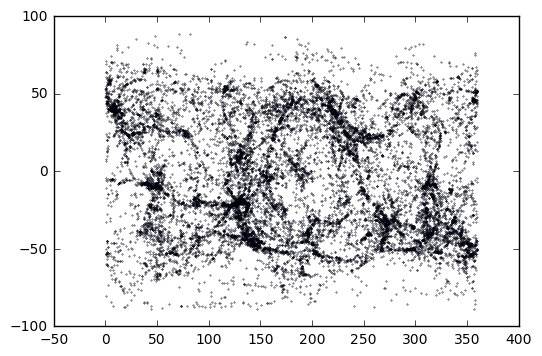

In [141]:
plt.scatter(ra,dec, s=0.1)

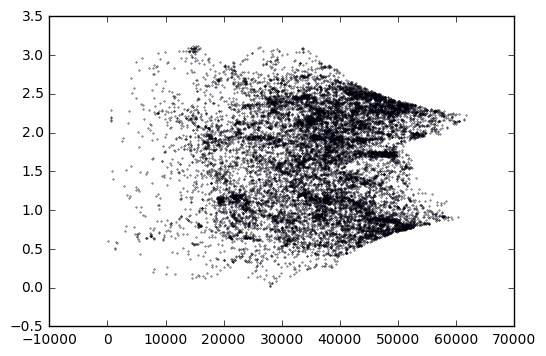

In [142]:
plt.scatter(r, theta, s=0.1)

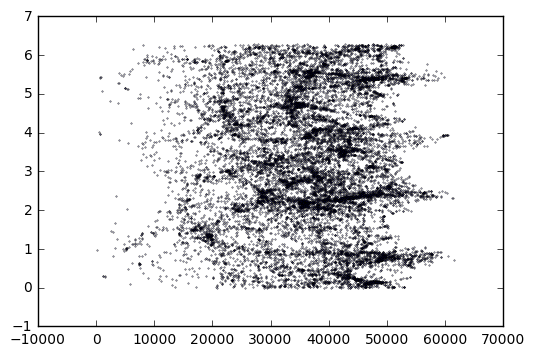

In [143]:
plt.scatter(r, phi, s=0.1)

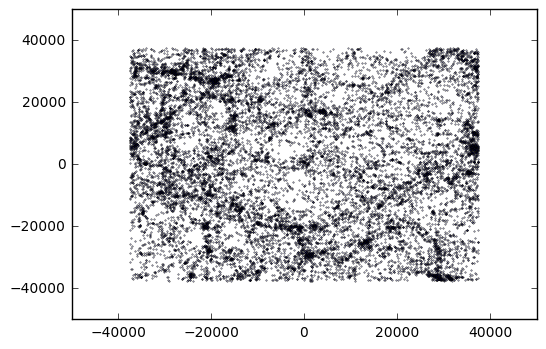

In [144]:
plt.scatter(r*np.cos(phi)*np.sin(theta), r*np.sin(phi)*np.sin(theta), s=0.1)

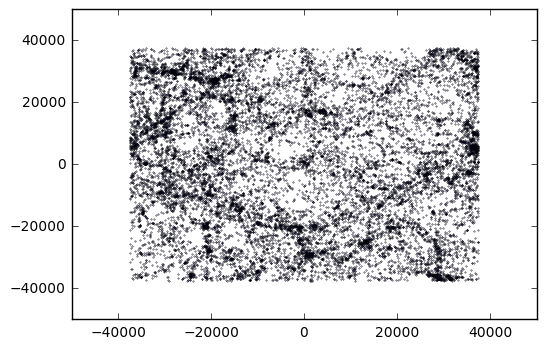

In [145]:
plt.scatter(centered_pos[:,0], centered_pos[:,1], s=0.1)

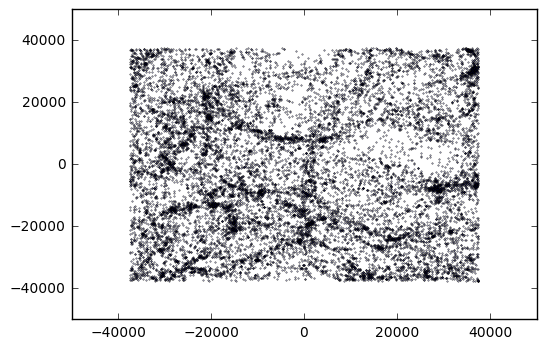

In [146]:
plt.scatter(r*np.cos(phi)*np.sin(theta), r*np.cos(theta), s=0.1)

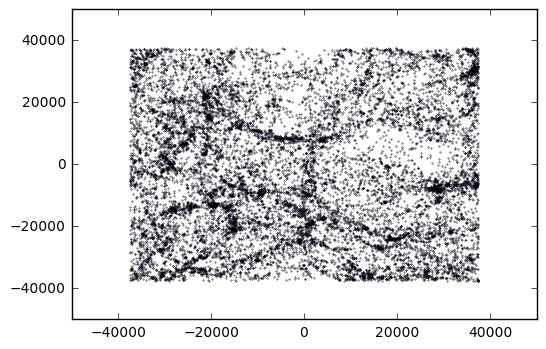

In [147]:
plt.scatter(centered_pos[:,0], centered_pos[:,2], s=0.1)


In [174]:
unit_pos = centered_pos.copy()
norm_pos = np.sqrt(centered_pos[:,0]**2+centered_pos[:,1]**2 + centered_pos[:,2]**2)
unit_pos[:,0] = centered_pos[:,0]/norm_pos
unit_pos[:,1] = centered_pos[:,1]/norm_pos
unit_pos[:,2] = centered_pos[:,2]/norm_pos

/lustre/apps/anaconda/3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/lustre/apps/anaconda/3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/lustre/apps/anaconda/3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


In [211]:
rad_vel = (r/1000.0)*100.0 + np.dot(centered_vel,unit_pos.T)[:,0] 

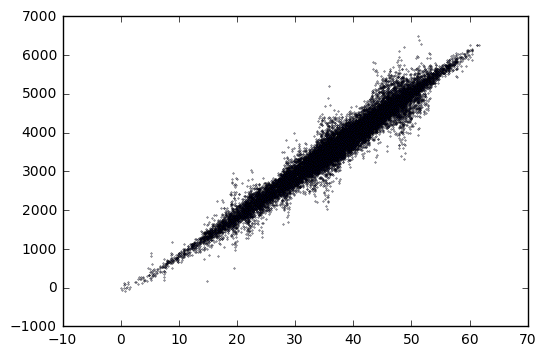

In [212]:
plt.scatter(r/1000.0, rad_vel, s=0.1)

In [293]:
selected  = rad_vel < 3500.0
print(np.shape(mags_in))

A = np.array([r[selected]/hubble,rad_vel[selected],ra[selected], dec[selected], 
            mags_in[selected,photo['B']], mags_in[selected,photo['K']]])

(16989, 8)


array([[  6.83962188e+04,   6.91140312e+04,   6.93851172e+04, ...,
          3.83135859e+04,   4.15886484e+04,   4.39761719e+04],
       [  3.40727539e+03,   3.31227832e+03,   3.48286938e+03, ...,
          2.64255664e+03,   2.56665381e+03,   2.63437769e+03],
       [  9.02800083e+00,   8.85915947e+00,   8.84368992e+00, ...,
          1.45317230e+02,   1.44026840e+02,   1.30910202e+02],
       [  3.98789520e+01,   4.00876465e+01,   4.02473946e+01, ...,
         -4.72585220e+01,  -4.81560631e+01,  -1.59749784e+01],
       [ -2.20506229e+01,  -2.16019726e+01,  -1.92647266e+01, ...,
         -1.76409969e+01,  -1.76472397e+01,  -1.75362778e+01],
       [ -2.57110100e+01,  -2.55279102e+01,  -2.25463696e+01, ...,
         -2.13241520e+01,  -2.11155949e+01,  -2.11211357e+01]], dtype=float32)

In [292]:
n_points = len(A[0])
print(n_points)
output = open('../data/simple_mock.dat', 'w')
output.write("# d_radial[Mpc] v_radial[km/s] ra deg MAG_B MAG_K")
for i in range(5):
    for j in range(n_points):
        output.write("{} ".format(A[i][j]))
    output.write("\n")
output.close()

7222


In [273]:
!head ../data/simple_mock.dat

# d_radial[Mpc] v_radial[km/s] ra deg MAG_B MAG_K48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
48150.9375 48656.27734375 48847.12109375 35534.69140625 35767.8671875 36023.11328125 
